# Problem Statement:
The business problem is to ensure a stable supply of rental bikes in urban cities by predicting the demand for bikes. By providing a stable supply of rental bikes, the system can enhance mobility comfort for the public and reduce waiting time, leading to greater customer satisfaction and accurately predicting bike demand can help bike sharing companies optimize operations including bike availability, pricing, strategies, and marketing efforts by considering demand Based on various external factors such as weather, season, holiday etc..,

# Step 1: Reading and Understanding the Data

In [2]:
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

##**Project Flow**
+ Data Analysis
+ Feature Engineering
+ Model Building
+ Deployment

# Loading The Dataset

In [3]:
df = pd.read_csv('bike_rent (1).csv')

##DATA ANALYSIS

In [4]:
df.shape

(17379, 17)

In [7]:
#statistical information
df.describe()

,instant,hr,weekday,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,3.003683,189.463088
std,5017.0295,6.914405,2.005771,181.387599
min,1.0000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,40.000000
50%,8690.0000,12.000000,3.000000,142.000000
75%,13034.5000,18.000000,5.000000,281.000000
max,17379.0000,23.000000,6.000000,977.000000


Since the difference between mean and median is not much , we can conclude that data has no outliers

In [8]:
# datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


In [9]:
# unique values
df.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            5
yr                3
mnth             13
hr               24
holiday           3
weekday           7
workingday        3
weathersit        5
temp             51
atemp            66
hum              90
windspeed        31
casual          323
registered      777
cnt             869
dtype: int64

In [10]:
df.fillna(0, inplace= False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,2,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
2,3,01-01-2011,springer,2011,1,2,No,6,No work,Clear,0.22,0.2727,?,0,5,27,32
3,4,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,5,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,springer,2012,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,17376,31-12-2012,springer,2012,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89
17376,17377,31-12-2012,springer,2012,12,21,No,1,Working Day,Clear,?,0.2576,0.6,0.1642,7,83,90
17377,17378,31-12-2012,springer,2012,12,22,No,1,Working Day,Clear,0.26,0.2727,0.56,0.1343,13,48,61


##**EDA**

**Before we starting the visualization,we do some feature engineering**

In [12]:
#Checking the missing values or null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**There is no Missing Values**

In [15]:
# List of numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Numerical Features:', numerical_features)
print("Length of numerical features:",len(numerical_features))
df[numerical_features].head()

Numerical Features: ['instant', 'hr', 'weekday', 'cnt']
Length of numerical features: 4


,instant,hr,weekday,cnt
0,1,0,6,16
1,2,1,6,40
2,3,2,6,32
3,4,3,6,13
4,5,4,6,1


In [14]:
# List of categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Categorical Features:', categorical_features)
print("Length of Categorical features:",len(categorical_features))
df[categorical_features].head()

Categorical Features: ['dteday', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
Length of Categorical features: 13


,dteday,season,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,01-01-2011,springer,2011,1,No,No work,Clear,0.24,0.2879,0.81,0,3,13
1,01-01-2011,springer,2011,1,No,No work,Clear,0.22,0.2727,0.8,0,8,32
2,01-01-2011,springer,2011,1,No,No work,Clear,0.22,0.2727,?,0,5,27
3,01-01-2011,springer,2011,1,No,No work,Clear,0.24,0.2879,0.75,0,3,10
4,01-01-2011,springer,2011,1,No,No work,Clear,0.24,0.2879,0.75,0,0,1


In [16]:
# Assuming "?" represents missing values, replace them with NaN
df.replace("?", pd.NA, inplace=True)

# Check for missing values again
df.isnull().sum()

instant        0
dteday         0
season         6
yr             1
mnth           1
hr             0
holiday        1
weekday        0
workingday     5
weathersit     4
temp          11
atemp          6
hum            6
windspeed      5
casual         1
registered     1
cnt            0
dtype: int64

In [17]:
#Dropping the missing values
df.dropna(inplace=True)

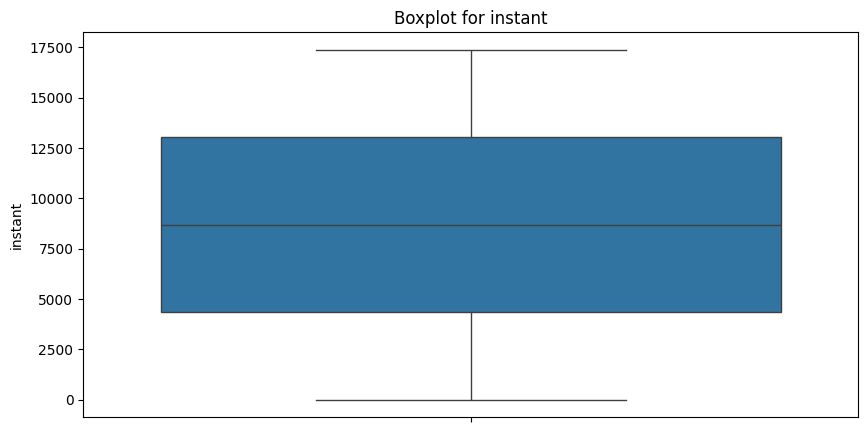

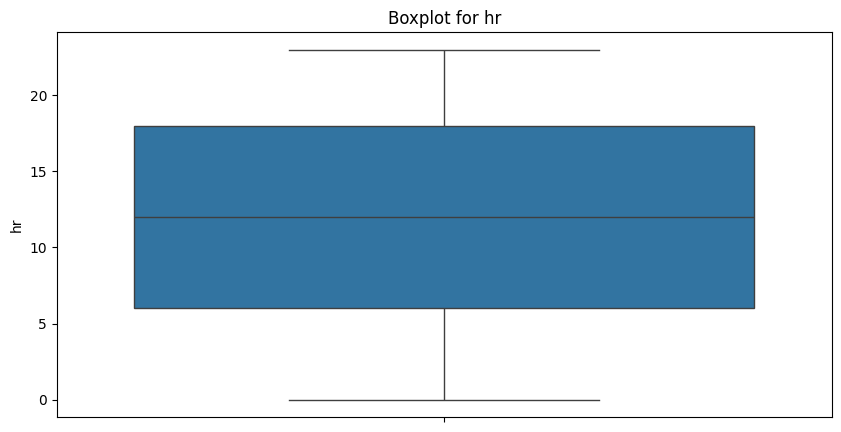

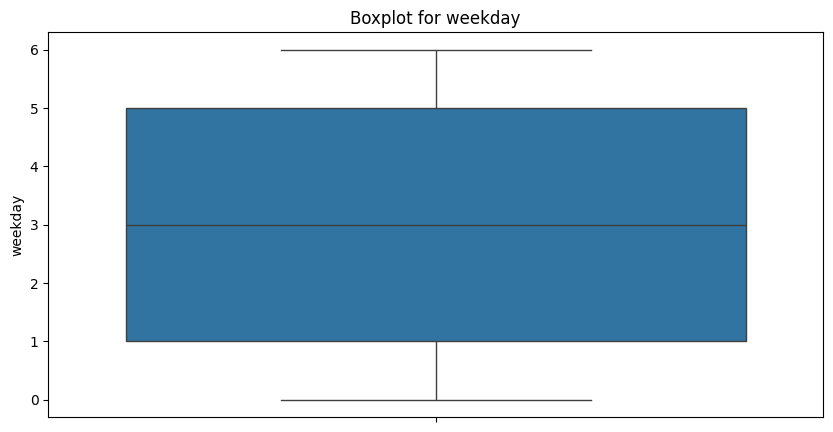

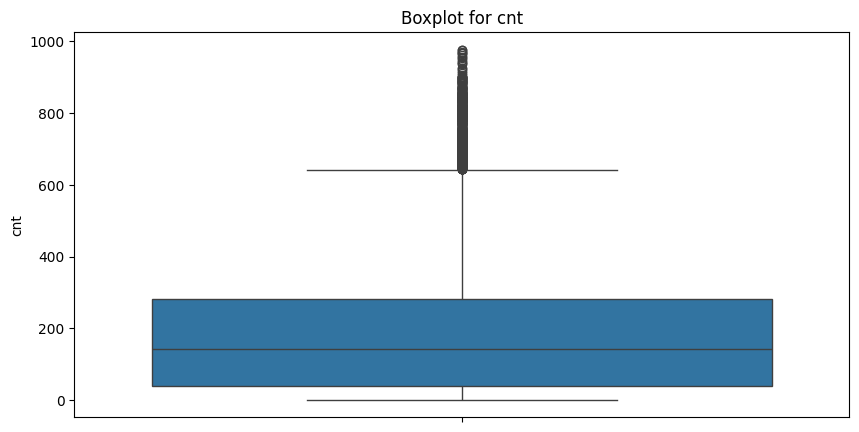

In [18]:
# Outlier detection using boxplots
for feature in numerical_features:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[feature])
  plt.title(f"Boxplot for {feature}")
  plt.show()


**In Count only we have outliers**

In [19]:
#Drop the instant feature ,because we already have the index
df.drop('instant',axis=1,inplace=True)

**After handling the outliers**

In [22]:
# Calculate the IQR for the 'cnt' feature
Q1 = df['cnt'].quantile(0.25)
Q3 = df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['cnt'] < lower_bound) | (df['cnt'] > upper_bound)]

# Remove outliers from the DataFrame
df = df[~df.index.isin(outliers.index)]

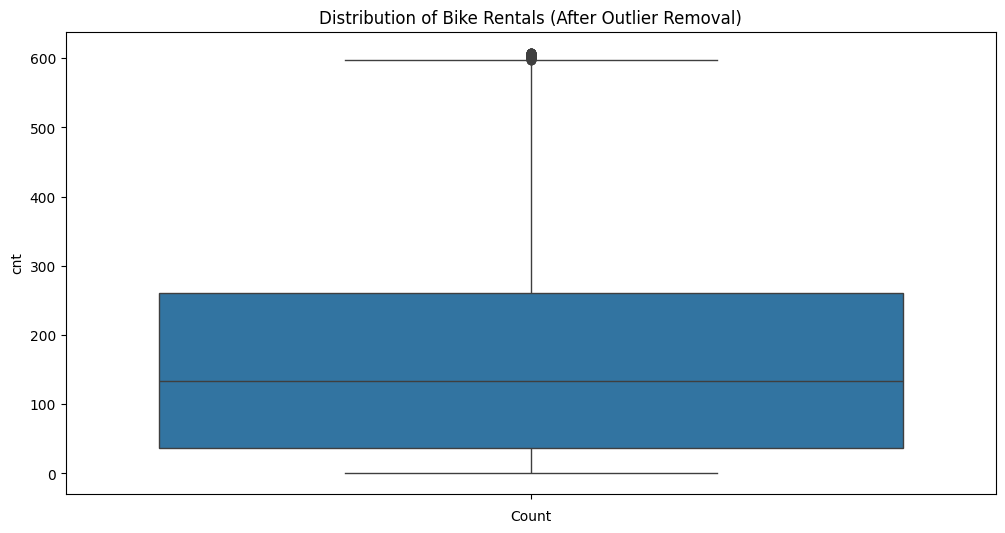

In [23]:
# Plot the distribution of 'cnt' before and after outlier removal
plt.figure(figsize=(12, 6))
sns.boxplot(df['cnt'])
plt.title('Distribution of Bike Rentals (After Outlier Removal)')
plt.xlabel('Count')
plt.show()

##**Data Visualizations(EDA)**

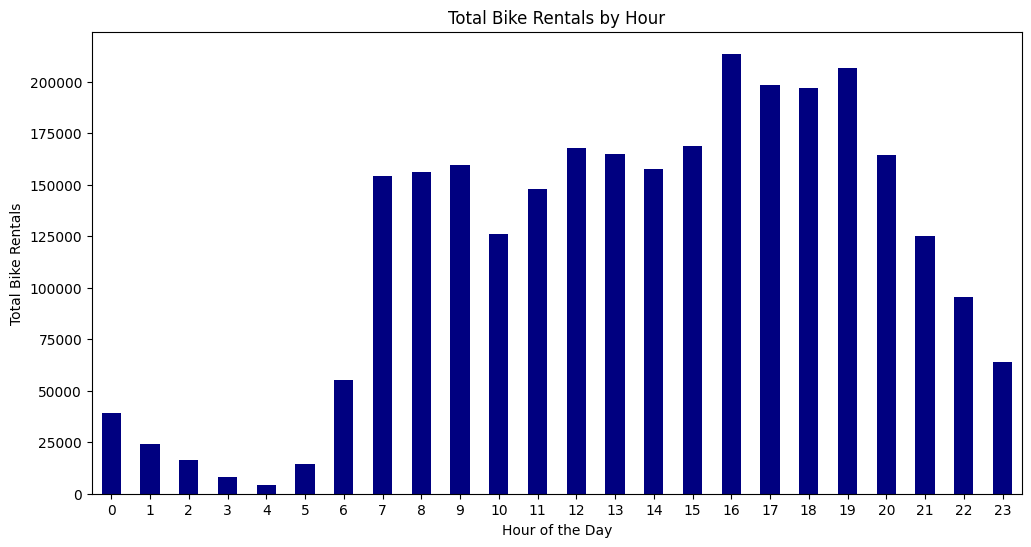

In [24]:
# Group the data by hour and calculate the total count for each hour
hourly_counts = df.groupby('hr')['cnt'].sum()

# Create a bar plot to visualize the hourly counts
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar',color='navy')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Hour')
plt.xticks(rotation=0)
plt.show()

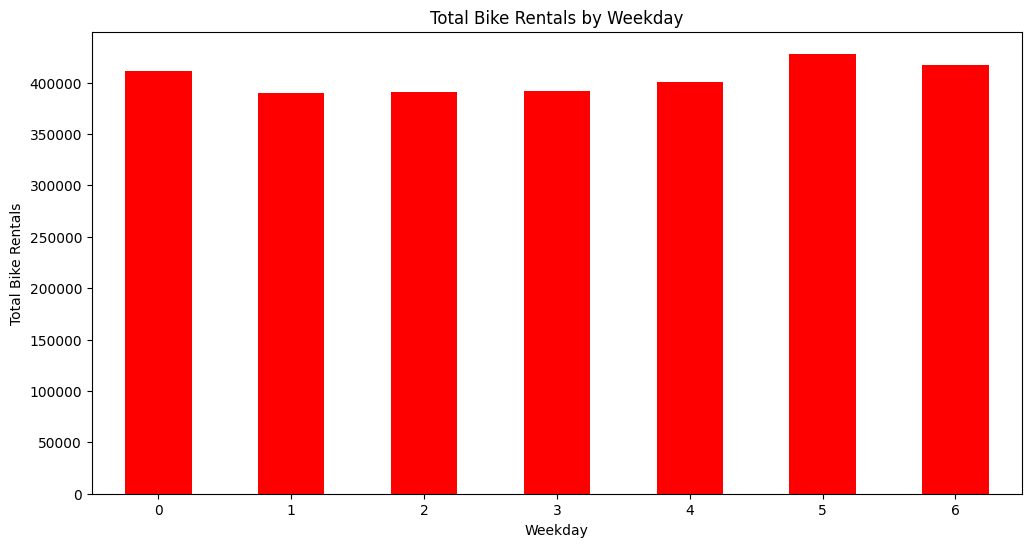

In [25]:
#plot for weekday by cnt

# Group the data by weekday and calculate the total count for each weekday
weekday_counts = df.groupby('weekday')['cnt'].sum()

# Create a bar plot to visualize the weekday counts
plt.figure(figsize=(12, 6))
weekday_counts.plot(kind='bar',color='red')
plt.xlabel('Weekday')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Weekday')
plt.xticks(rotation=0)
plt.show()

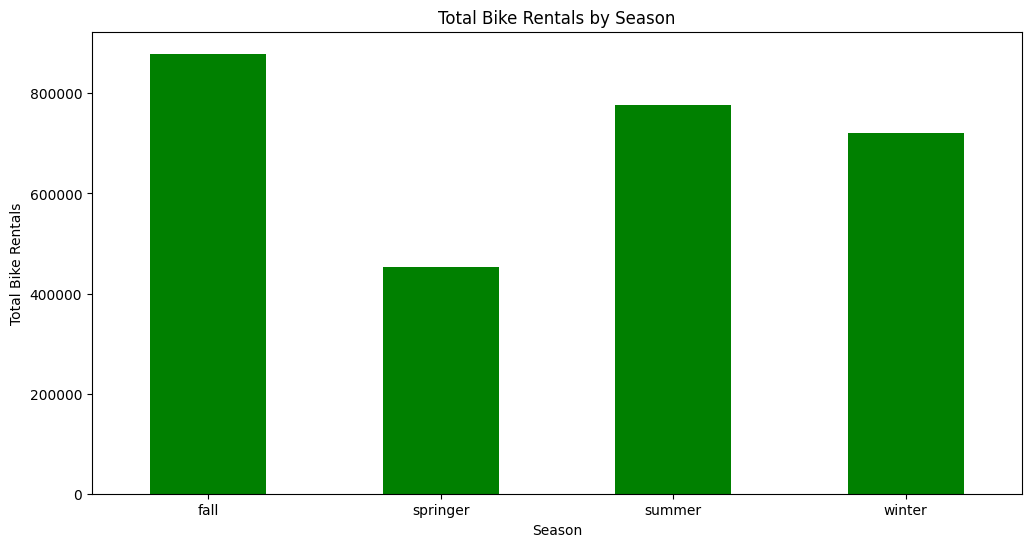

In [26]:
#plot for season by cnt

# Group the data by season and calculate the total count for each season
season_counts = df.groupby('season')['cnt'].sum()

# Create a bar plot to visualize the season counts
plt.figure(figsize=(12, 6))
season_counts.plot(kind='bar', color='green')
plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Season')
plt.xticks(rotation=0)
plt.show()


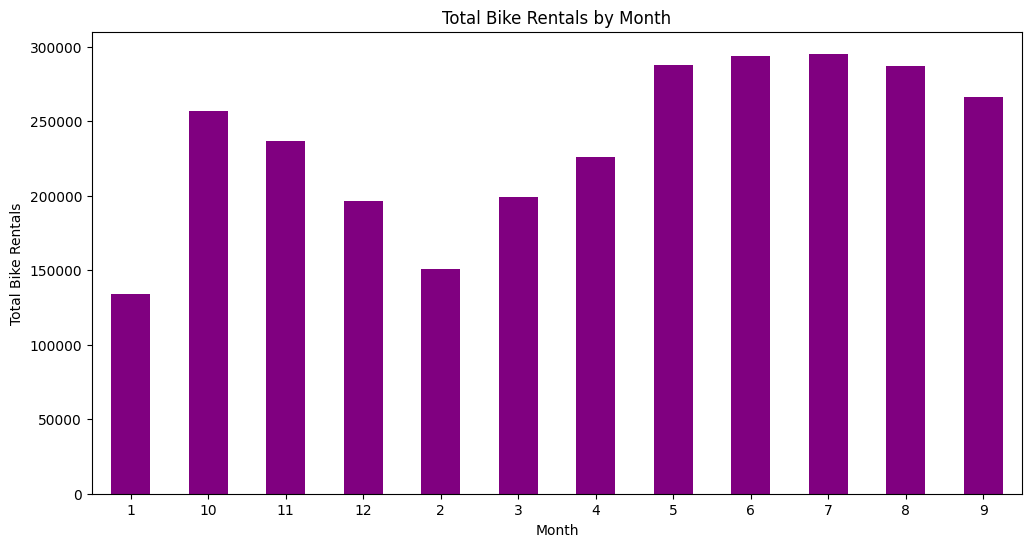

In [27]:
#plot for month by cnt

# Group the data by month and calculate the total count for each month
monthly_counts = df.groupby('mnth')['cnt'].sum()

# Create a bar plot to visualize the monthly counts
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', color='purple')
plt.xlabel('Month')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Month')
plt.xticks(rotation=0)
plt.show()

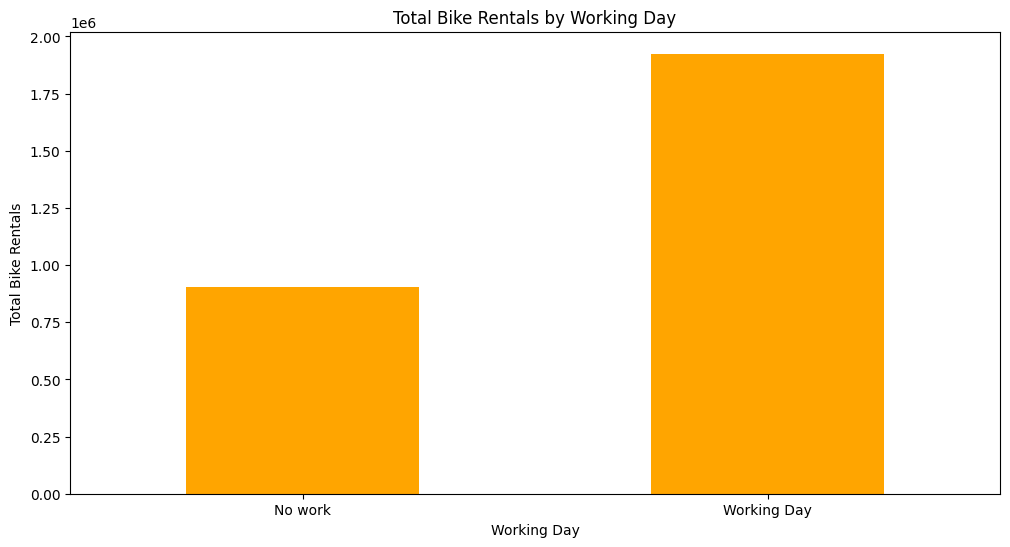

In [28]:
#plot for working day by cnt

# Group the data by workingday and calculate the total count for each workingday
workingday_counts = df.groupby('workingday')['cnt'].sum()

# Create a bar plot to visualize the workingday counts
plt.figure(figsize=(12, 6))
workingday_counts.plot(kind='bar', color='orange')
plt.xlabel('Working Day')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Working Day')
plt.xticks(rotation=0)
plt.show()

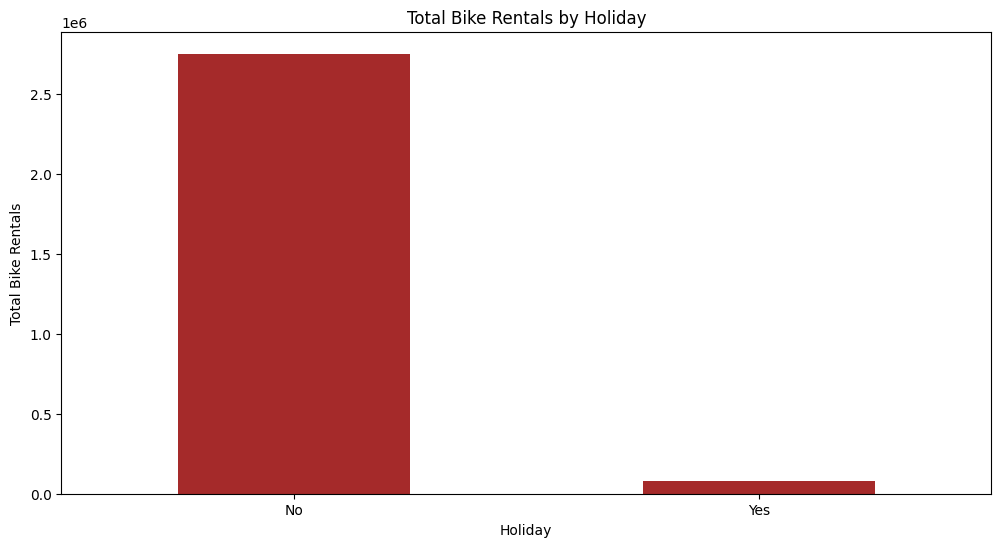

In [29]:
#plot for holiday by cnt

# Group the data by holiday and calculate the total count for each holiday
holiday_counts = df.groupby('holiday')['cnt'].sum()

# Create a bar plot to visualize the holiday counts
plt.figure(figsize=(12, 6))
holiday_counts.plot(kind='bar', color='brown')
plt.xlabel('Holiday')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Holiday')
plt.xticks(rotation=0)
plt.show()

In [30]:
df = df.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df.head()


,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011,springer,2011,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,01-01-2011,springer,2011,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
3,01-01-2011,springer,2011,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,01-01-2011,springer,2011,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
5,01-01-2011,springer,2011,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1


In [32]:
df = df.drop(columns=[ 'dteday', 'year'])

In [33]:
### Converting some numeric values to categorical data
import calendar
cols = ['season','month','hour','holiday','weekday','workingday','weather','casual','registered','temp']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16704 entries, 0 to 17377
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      16704 non-null  category
 1   month       16704 non-null  category
 2   hour        16704 non-null  category
 3   holiday     16704 non-null  category
 4   weekday     16704 non-null  category
 5   workingday  16704 non-null  category
 6   weather     16704 non-null  category
 7   temp        16704 non-null  category
 8   atemp       16704 non-null  object  
 9   humidity    16704 non-null  object  
 10  windspeed   16704 non-null  object  
 11  casual      16704 non-null  category
 12  registered  16704 non-null  category
 13  count       16704 non-null  int64   
dtypes: category(10), int64(1), object(3)
memory usage: 1.4+ MB


In [34]:
df.columns

Index(['season', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

# One hot Encoding

In [35]:
pd.get_dummies(df['season'], prefix='season', drop_first=True)

,season_springer,season_summer,season_winter
0,True,False,False
1,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
...,...,...,...
17370,True,False,False
17373,True,False,False
17374,True,False,False
17375,True,False,False


In [36]:
pd.get_dummies(df['holiday'], prefix='holiday', drop_first=True)

,holiday_Yes
0,False
1,False
3,False
4,False
5,False
...,...
17370,False
17373,False
17374,False
17375,False


In [37]:
pd.get_dummies(df['workingday'], prefix='workingday', drop_first=True)

,workingday_Working Day
0,False
1,False
3,False
4,False
5,False
...,...
17370,True
17373,True
17374,True
17375,True


In [38]:
pd.get_dummies(df['weather'], prefix='weather', drop_first=True)

,weather_Heavy Rain,weather_Light Snow,weather_Mist
0,False,False,False
1,False,False,False
3,False,False,False
4,False,False,False
5,False,False,True
...,...,...,...
17370,False,False,True
17373,False,False,True
17374,False,False,True
17375,False,False,True


In [39]:
df = pd.DataFrame(df)

In [40]:
df = df.replace('?',0)

In [41]:
df

,season,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,springer,1,0,No,6,No work,Clear,0.24,0.2879,0.81,0,3,13,16
1,springer,1,1,No,6,No work,Clear,0.22,0.2727,0.8,0,8,32,40
3,springer,1,3,No,6,No work,Clear,0.24,0.2879,0.75,0,3,10,13
4,springer,1,4,No,6,No work,Clear,0.24,0.2879,0.75,0,0,1,1
5,springer,1,5,No,6,No work,Mist,0.24,0.2576,0.75,0.0896,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,springer,12,15,No,1,Working Day,Mist,0.28,0.2879,0.45,0.1343,69,246,315
17373,springer,12,18,No,1,Working Day,Mist,0.26,0.2727,0.48,0.1343,10,112,122
17374,springer,12,19,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,11,108,119
17375,springer,12,20,No,1,Working Day,Mist,0.26,0.2576,0.6,0.1642,8,81,89


In [42]:
df_oh = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['season', 'holiday', 'workingday', 'weather']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()

,month,hour,weekday,temp,atemp,humidity,windspeed,casual,registered,count,season_springer,season_summer,season_winter,holiday_Yes,workingday_Working Day,weather_Heavy Rain,weather_Light Snow,weather_Mist
0,1,0,6,0.24,0.2879,0.81,0,3,13,16,True,False,False,False,False,False,False,False
1,1,1,6,0.22,0.2727,0.8,0,8,32,40,True,False,False,False,False,False,False,False
3,1,3,6,0.24,0.2879,0.75,0,3,10,13,True,False,False,False,False,False,False,False
4,1,4,6,0.24,0.2879,0.75,0,0,1,1,True,False,False,False,False,False,False,False
5,1,5,6,0.24,0.2576,0.75,0.0896,0,1,1,True,False,False,False,False,False,False,True


In [43]:
df_oh

,month,hour,weekday,temp,atemp,humidity,windspeed,casual,registered,count,season_springer,season_summer,season_winter,holiday_Yes,workingday_Working Day,weather_Heavy Rain,weather_Light Snow,weather_Mist
0,1,0,6,0.24,0.2879,0.81,0,3,13,16,True,False,False,False,False,False,False,False
1,1,1,6,0.22,0.2727,0.8,0,8,32,40,True,False,False,False,False,False,False,False
3,1,3,6,0.24,0.2879,0.75,0,3,10,13,True,False,False,False,False,False,False,False
4,1,4,6,0.24,0.2879,0.75,0,0,1,1,True,False,False,False,False,False,False,False
5,1,5,6,0.24,0.2576,0.75,0.0896,0,1,1,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,12,15,1,0.28,0.2879,0.45,0.1343,69,246,315,True,False,False,False,True,False,False,True
17373,12,18,1,0.26,0.2727,0.48,0.1343,10,112,122,True,False,False,False,True,False,False,True
17374,12,19,1,0.26,0.2576,0.6,0.1642,11,108,119,True,False,False,False,True,False,False,True
17375,12,20,1,0.26,0.2576,0.6,0.1642,8,81,89,True,False,False,False,True,False,False,True


#Model Building

In [45]:
X = df_oh.drop(columns=['atemp', 'casual', 'registered', 'count'], axis=1)
y = df_oh['count']

In [46]:
X

,month,hour,weekday,temp,humidity,windspeed,season_springer,season_summer,season_winter,holiday_Yes,workingday_Working Day,weather_Heavy Rain,weather_Light Snow,weather_Mist
0,1,0,6,0.24,0.81,0,True,False,False,False,False,False,False,False
1,1,1,6,0.22,0.8,0,True,False,False,False,False,False,False,False
3,1,3,6,0.24,0.75,0,True,False,False,False,False,False,False,False
4,1,4,6,0.24,0.75,0,True,False,False,False,False,False,False,False
5,1,5,6,0.24,0.75,0.0896,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17370,12,15,1,0.28,0.45,0.1343,True,False,False,False,True,False,False,True
17373,12,18,1,0.26,0.48,0.1343,True,False,False,False,True,False,False,True
17374,12,19,1,0.26,0.6,0.1642,True,False,False,False,True,False,False,True
17375,12,20,1,0.26,0.6,0.1642,True,False,False,False,True,False,False,True


In [47]:
y

0         16
1         40
3         13
4          1
5          1
        ... 
17370    315
17373    122
17374    119
17375     89
17377     61
Name: count, Length: 16704, dtype: int64

# Model Training

In [48]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = [DecisionTreeRegressor(),
         RandomForestRegressor(),
         GradientBoostingRegressor()]

##**Model Evaluation**

In [49]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, shuffle=True ,random_state=42)
    pred = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [50]:
for model in models:
    train(model)

Model: DecisionTreeRegressor()
CV score: 6183.90999081006
Model: RandomForestRegressor()
CV score: 3239.130483838032
Model: GradientBoostingRegressor()
CV score: 5304.621589138323


##**Split the Data**

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##**Deployment**
**We only take DecisionTree Regression for Deployment**

In [55]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [56]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

80.36551027560417

In [57]:
import pickle

In [58]:
pickle.dump(model, open("temp_model.pkl",'wb'))

In [59]:
temp_model_test = pickle.load(open("temp_model.pkl",'rb'))

In [60]:
y_pred

array([ 24., 403., 445., ...,  30., 298., 312.])

In [61]:
x_test

,month,hour,weekday,temp,humidity,windspeed,season_springer,season_summer,season_winter,holiday_Yes,workingday_Working Day,weather_Heavy Rain,weather_Light Snow,weather_Mist
4899,7,1,4,0.72,0.51,0,False,False,False,False,True,False,False,False
7634,11,17,6,0.4,0.4,0.194,False,False,True,False,False,False,False,False
1755,3,20,5,0.62,0.46,0.1343,True,False,False,False,True,False,False,False
17348,12,17,0,0.26,0.41,0.3284,True,False,False,False,False,False,False,False
4578,7,16,4,0.76,0.33,0.1343,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15619,10,0,4,0.46,0.88,0.194,False,False,True,False,True,False,False,False
13106,7,7,4,0.76,0.55,0,False,False,False,False,True,False,False,False
740,2,6,4,0.16,0.43,0.3582,True,False,False,False,True,False,False,False
11837,5,10,0,0.6,0.6,0.2537,False,True,False,False,False,False,False,False


In [62]:
X.columns

Index(['month', 'hour', 'weekday', 'temp', 'humidity', 'windspeed',
       'season_springer', 'season_summer', 'season_winter', 'holiday_Yes',
       'workingday_Working Day', 'weather_Heavy Rain', 'weather_Light Snow',
       'weather_Mist'],
      dtype='object')